In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
data = pd.read_csv('train_preprocessed.csv')
data.head()


,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,1,0,1,1,0,1,0,1,1,2
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,0,1,1,0,1,0,1,1,2
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,0,1,1,1,1,0,1,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,1,0,1,0,1,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,0,1,1,1,1,1


In [2]:
Qtime = data.iloc[:,1::2].iloc[:,:20]
Qtimes = pd.DataFrame(np.where(Qtime>Qtime.median(),1,0),index = Qtime.index,columns = Qtime.columns)
data['QaE	QbE	QcE	QdE	QeE	QfE	QgE	QhE	QiE	QjE	QkE	QlE	QmE	QnE	QoE	QpE	QqE	QrE	QsE	QtE'.split('\t')] = Qtimes
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,0,1,1,0,1,0,1,1,2
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,0,1,1,0,1,0,1,1,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,0,1,1,1,1,0,1,1,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,0,1,0,1,0,1,1,1
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,1,0,1,1,1,1,1


In [3]:
Qaswer = data.iloc[:,::2].iloc[:,:20]
Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]] = 6 - Qaswer[["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]]
data['MachScore']=Qaswer.mean(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,1,1,0,1,0,1,1,2,2.95
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,1,1,0,1,0,1,1,2,2.60
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,0,1,1,1,1,0,1,1,1,1.90
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,0,1,0,1,0,1,1,1,3.35
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,0,1,1,1,1,1,3.00


In [4]:
data['Qtsum'] = data.iloc[:,1::2].iloc[:,:20].sum(axis = 1)
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,voted,MachScore,Qtsum
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,0,1,0,1,1,2,2.95,7
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,0,1,0,1,1,2,2.60,20
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1,0,1,1,1,1.90,17
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,0,1,0,1,0,1,1,1,3.35,16
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,0,1,1,1,1,1,3.00,7


In [5]:
## TIPI 점수 계산법 출처  https://gosling.psy.utexas.edu/scales-weve-developed/ten-item-personality-measure-tipi/
data[['tp02','tp04','tp06','tp08','tp10']]= 7-data[['tp02','tp04','tp06','tp08','tp10']]
data['Extraversion']=(data.tp01+data.tp06)/2
data['Agreeableness']=(data.tp02+data.tp07)/2
data['Conscientiousness']=(data.tp03+data.tp08)/2
data['Emotional Stability']=(data.tp04+data.tp09)/2
data['Openness to Experiences']=(data.tp05+data.tp10)/2

In [6]:
tipi_threshold_table = {
    'Male':{
        '10s':[(3.79,1.55),(4.47,1.22),(4.41,1.39),(4.61,1.47),(5.43,1.17)],
        '20s':[(3.73,1.54),(4.5,1.2),(4.57,1.39),(4.64,1.46),(5.49,1.13)],
        '30s':[(3.81,1.55),(4.55,1.21),(4.77,1.35),(4.63,1.42),(5.49,1.12)],
        '40s':[(3.85,1.54),(4.7,1.18),(4.96,1.35),(4.72,1.39),(5.41,1.17)],
        '50s':[(3.87,1.54),(4.89,1.18),(5.11,1.31),(4.8,1.38),(5.39,1.2)],
        '60s':[(3.85,1.49),(4.95,1.17),(5.26,1.3),(4.92,1.34),(5.37,1.26)],
        '+70s':[(3.85,1.49),(4.95,1.17),(5.26,1.3),(4.92,1.34),(5.37,1.26)]
    },
    'Female':{
        '10s':[(4.06,1.58),(4.73,1.22),(4.52,1.42),(4.07,1.46),(5.58,1.1)],
        '20s':[(4.07,1.61),(4.88,1.19),(4.78,1.41),(4.09,1.45),(5.55,1.12)],
        '30s':[(4.17,1.64),(5.04,1.19),(4.97,1.41),(4.25,1.45),(5.49,1.18)],
        '40s':[(4.2,1.64),(5.28,1.17),(5.18,1.36),(4.49,1.45),(5.46,1.2)],
        '50s':[(4.18,1.6),(5.43,1.14),(5.35,1.31),(4.66,1.44),(5.42,1.25)],
        '60s':[(4.21,1.62),(5.5,1.15),(5.39,1.36),(4.84,1.4),(5.39,1.27)],
        '+70s':[(4.21,1.62),(5.5,1.15),(5.39,1.36),(4.84,1.4),(5.39,1.27)]
    }
}

big_five_personality = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']

def binarize_big_5_personality(row):
    for idx,col in enumerate(big_five_personality):
        mean = 7 - tipi_threshold_table[row.gender][row.age_group][idx][0]
        std = tipi_threshold_table[row.gender][row.age_group][idx][1]
        if row[col] > mean + std:
            row[col] = 1
        elif row[col] > mean:
            row[col] = 2
        elif row[col] > mean - std:
            row[col] = 3
        else:
            row[col] = 4       
        
    return row
data = data.apply(binarize_big_5_personality,axis=1)

In [7]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_12,wr_13,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,1,1,2,2.95,7,2,1,2,1,1
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,1,1,2,2.60,20,2,1,3,2,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1,1,1.90,17,3,2,3,3,1
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,1,1,3.35,16,2,3,2,2,2
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,1,1,3.00,7,3,2,4,3,3


In [8]:
data.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'voted',
       'MachScore', 'Qtsum', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional Stability', 'Openness to Experiences'],
      dtype='object')

In [9]:
data['age'] = data['age_group'].map({'10s':10, '20s':20, '30s':30, '40s':40, '50s':50, '60s':60, '+70s':70})

In [10]:
data['voted'] = data['voted'].map({1:1,2:0})

In [11]:
data['gender'] = data['gender'].map({'Male':1,'Female':0})

In [12]:
columnlist=['age','gender','MachScore','education','voted','married','Qtsum', 'Extraversion', 'Agreeableness',
'Conscientiousness','Emotional Stability', 'Openness to Experiences']

In [13]:
subdata = data[columnlist].copy()
subdata.head()

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,30,0,2.95,2,0,3,7,2,1,2,1,1
1,20,0,2.60,4,0,1,20,2,1,3,2,2
2,30,1,1.90,3,1,2,17,3,2,3,3,1
3,20,0,3.35,4,1,1,16,2,3,2,2,2
4,20,1,3.00,3,1,2,7,3,2,4,3,3


In [14]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaledata= mm.fit_transform(subdata)

In [15]:
scaledata = pd.DataFrame(scaledata,columns = columnlist)
scaledata.describe()

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
count,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000,45529.000000
mean,0.233796,0.531837,0.588125,0.525336,0.453162,0.194865,0.499489,0.371829,0.299545,0.440335,0.386706,0.394298
std,0.228828,0.498991,0.198670,0.301783,0.497807,0.318610,0.269364,0.347994,0.314494,0.334749,0.335045,0.275410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.437500,0.333333,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.166667,1.000000,0.587500,0.666667,0.000000,0.000000,0.500000,0.333333,0.333333,0.333333,0.333333,0.333333
75%,0.333333,1.000000,0.737500,0.666667,1.000000,0.500000,0.700000,0.666667,0.666667,0.666667,0.666667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


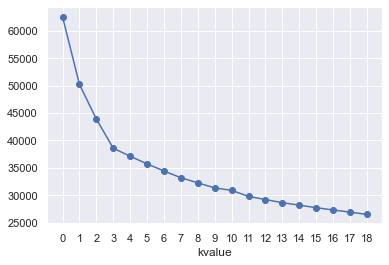

In [16]:
from sklearn.cluster import KMeans
dist =[]
for i in range(1,20):
    km = KMeans(n_clusters=i,init = 'k-means++',n_init=10,max_iter = 200)
    km.fit(scaledata)
    dist.append(km.inertia_)
plt.plot(range(len(dist)),dist,marker = 'o')
ticks = plt.xticks(range(len(dist)))
plt.xlabel('kvalue')
plt.show()

In [17]:
knn = KMeans(n_clusters =3)
knn.fit(scaledata)
y_km= knn.predict(scaledata)
data['k3'] = y_km

In [18]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,voted,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,0,2.95,7,2,1,2,1,1,30,1
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,0,2.60,20,2,1,3,2,2,20,1
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1,1.90,17,3,2,3,3,1,30,0
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,1,3.35,16,2,3,2,2,2,20,0
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,1,3.00,7,3,2,4,3,3,20,0


In [19]:
pd.DataFrame(mm.inverse_transform(knn.cluster_centers_),columns = columnlist)

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,29.177491,5.243311e-01,3.263302,2.911012,1.000000e+00,1.540035,10.387941,2.164453,1.939705,2.375582,2.235799,2.227026
1,20.225198,1.576517e-14,3.208369,2.310234,1.049161e-14,1.317712,9.525172,2.045561,1.899835,2.250152,1.964177,2.111034
2,19.361003,1.000000e+00,3.613620,2.288220,2.248202e-14,1.220066,9.775455,2.100105,1.834354,2.297775,2.211780,2.176620


#### 중심점 해석 ####
| 나이 | 성별 | 마키아벨리즘 | 교육수준 | 투표 | 결혼 | Qtime |Extraversion|Agreeableness|Conscientiousness|Emotiona tability|Openness|
|---|---|---|---|---|---|---|---|---|---|---|---|
|29|남성 또는 여성|3.2|대졸|투표 o|결혼 또는 미혼|10.3|2.1|1.9|2.3|2.3|2.2|
|20|여성|3.2|고졸|투표x|미혼|9.5|2.0|1.8|2.2|1.9|2.1|
|19|남성|3.6|고졸|투표x|미혼|9.7|2.1|1.8|2.2|2.2|2.1|

- 성별 1 남성 0 여성
- 교육수준 1: 고등학교 미만 2:고등학교 졸업 3: 대학졸업 4: 대학원졸업
- 투표 : 1 : 투표함 0: 투표 안함
- 결혼 : 1=미혼, 2= 기혼, 3= 이혼 경험 유 , 0= 이외
- TIPI 범위 1 ~ 2 ~ 3 ~ 4 ( 매우 높음 높음 낮음 매우낮음 )

In [20]:
# k = 4 라면 
km = KMeans(n_clusters =4)
km.fit(scaledata)
ykm= km.predict(scaledata)
data['k4'] = ykm

In [21]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3,k4
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,2.95,7,2,1,2,1,1,30,1,2
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,2.60,20,2,1,3,2,2,20,1,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1.90,17,3,2,3,3,1,30,0,3
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,3.35,16,2,3,2,2,2,20,0,1
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,3.00,7,3,2,4,3,3,20,0,3


In [22]:
pd.DataFrame(mm.inverse_transform(km.cluster_centers_),columns = columnlist)

,age,gender,MachScore,education,voted,married,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,19.361003,1.000000e+00,3.613620,2.288220,2.248202e-14,1.220066,9.775455,2.100105,1.834354,2.297775,2.211780,2.176620
1,30.604239,3.441691e-15,3.024384,2.951600,1.000000e+00,1.642450,10.133992,2.136642,2.011107,2.333096,2.140615,2.221622
2,20.225198,1.565414e-14,3.208369,2.310234,1.043610e-14,1.317712,9.525172,2.045561,1.899835,2.250152,1.964177,2.111034
3,27.883158,1.000000e+00,3.480047,2.874191,1.000000e+00,1.447125,10.618321,2.189684,1.874931,2.414125,2.322148,2.231928


| 나이 | 성별 | 마키아벨리즘 | 교육수준 | 투표 | 결혼 | Qtime |Extraversion|Agreeableness|Conscientiousness|Emotiona tability|Openness|
|---|---|---|---|---|---|---|---|---|---|---|---|
|19|남성|3.6|고졸|투표x|미혼|9.7|	2.1|	1.8|	2.2|	2.2|	2.1|
|30|여성|3.0|대졸|투표o|결혼o또는미혼|10.1|	2.1|	2.0|	2.3|	2.1|	2.2|
|20|여성|3.2|고졸|투표x|미혼|9.5|	2.0|	1.8|	2.2|	1.9|	2.1|
|27|남성|3.4|대졸|투표o|미혼|10.6|	2.1|	1.8|	2.4|	2.3|	2.2|

In [23]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,MachScore,Qtsum,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,age,k3,k4
0,3.0,0,4.0,1,5.0,1,1.0,1,2.0,1,...,2.95,7,2,1,2,1,1,30,1,2
1,5.0,1,5.0,1,3.0,1,5.0,1,1.0,1,...,2.60,20,2,1,3,2,2,20,1,2
2,4.0,1,1.0,1,1.0,1,4.0,1,5.0,1,...,1.90,17,3,2,3,3,1,30,0,3
3,3.0,0,3.0,1,4.0,1,3.0,1,1.0,0,...,3.35,16,2,3,2,2,2,20,0,1
4,1.0,1,1.0,0,5.0,0,2.0,1,1.0,0,...,3.00,7,3,2,4,3,3,20,0,3
